# Interpolation

Interpolation allows you to find or create new points between a set of known points.

<img src="interpolation.png">
Taken from https://en.wikipedia.org/wiki/Bicubic_interpolation

## 1D nearest-neighbour interpolation

Having the known points $(x_0,y_0)$ and $(x_1,y_1)$, the value of a new $y$ for a new $x$ between $x_0$ and $x_1$ is:

\begin{align}
y=
\begin{cases}
    y_0, & \text{if } abs(x-x_0) <= abs(x-x_1)\\
    y1, & \text{otherwise}
\end{cases}
\end{align}

Example:

<img width="400" src="nearest_1d.png">
Taken from https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation

## 1D linear interpolation

Having the known points $(x_0,y_0)$ and $(x_1,y_1)$, the new point $(x,y)$ must be in the straight line between these points.

<img width="300" src="interpolation_linear1d.png">
Taken from https://en.wikipedia.org/wiki/Linear_interpolation

\begin{align}
\frac{y-y_0}{x-x_0} = \frac{y_1-y_0}{x_1-x_0}
\end{align}

Having $x$ and solving for $y$:

\begin{align}
y = y_0 + (x-x_0)\frac{y_1-y_0}{x_1-x_0}
\end{align}

## 1D polinomial interpolation

We must construct the model from $n$ pair of points, where $n$ is the order of the interpolation.

\begin{align}
p(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_2 x^2 + a_1 x + a_0. \qquad
\end{align}

You can represent it in its matricial form, in order to solve it (find the coefficients):

\begin{align}
\begin{bmatrix}
x_0^n  & x_0^{n-1} & x_0^{n-2} & \ldots & x_0 & 1 \\
x_1^n  & x_1^{n-1} & x_1^{n-2} & \ldots & x_1 & 1 \\
\vdots & \vdots    & \vdots    &        & \vdots & \vdots \\
x_n^n  & x_n^{n-1} & x_n^{n-2} & \ldots & x_n & 1
\end{bmatrix}
\begin{bmatrix} a_n \\ a_{n-1} \\ \vdots \\ a_0 \end{bmatrix}  =
\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}
\end{align}

For example, the red points are known, and the blue line is the interpolation:

<img width="350" src="interpolation_poli1d.png">
Taken from https://en.wikipedia.org/wiki/Polynomial_interpolation

## 2D bilinear interpolation

You perform linear interpolation in $x$, and then in $y$.

<img width="320" src="interpolation_bilinear.png">

\begin{align}
f(R_1) \approx \frac{x_2-x}{x_2-x_1} f(Q_{11}) + \frac{x-x_1}{x_2-x_1} f(Q_{21})
\end{align}

\begin{align}
f(R_2) \approx \frac{x_2-x}{x_2-x_1} f(Q_{12}) + \frac{x-x_1}{x_2-x_1} f(Q_{22})
\end{align}

\begin{align}
f(P) \approx \frac{y_2-y}{y_2-y_1} f(R_1) + \frac{y-y_1}{y_2-y_1} f(R_2)
\end{align}

# Downsampling (Resize to a lower resolution)

When you change the size or resolution of an image, you need to interpolate to calculate the value of the new pixel position.

For example:

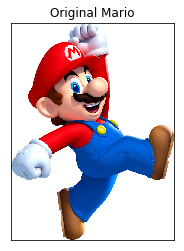

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import cv2

imgMario = cv2.imread('mario.png')
plt.imshow(imgMario[...,::-1])
plt.title('Original Mario'), plt.xticks([]), plt.yticks([])
plt.show()

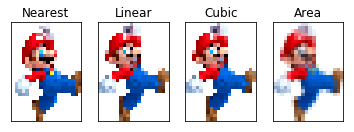

In [23]:
imgMario1 = cv2.resize(imgMario, (20, 28), interpolation = cv2.INTER_NEAREST) 
plt.subplot(241)
plt.imshow(imgMario1[...,::-1])
plt.title('Nearest'), plt.xticks([]), plt.yticks([])

imgMario1 = cv2.resize(imgMario, (20, 28), interpolation = cv2.INTER_LINEAR) 
plt.subplot(242)
plt.imshow(imgMario1[...,::-1])
plt.title('Linear'), plt.xticks([]), plt.yticks([])

imgMario1 = cv2.resize(imgMario, (20, 28), interpolation = cv2.INTER_CUBIC) 
plt.subplot(243)
plt.imshow(imgMario1[...,::-1])
plt.title('Cubic'), plt.xticks([]), plt.yticks([])

imgMario1 = cv2.resize(imgMario, (20, 28), interpolation = cv2.INTER_AREA) 
plt.subplot(244)
plt.imshow(imgMario1[...,::-1])
plt.title('Area'), plt.xticks([]), plt.yticks([])

plt.show()

# Image Pyramids